# **Code:**

In [1]:
#Importing required libraries
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# **Loading dataset**

In [2]:
pip install ucimlrepo

In [3]:
#Loading dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)


{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'published_in': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, Bogazici University', 

# **Data Preprocessing**

In [4]:
#ptintng features dataframe
print(X)

      Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0              0           1           6          15          12           1   
1              0           0          10          16           6           0   
2              0           0           8          15          16          13   
3              0           0           0           3          11          16   
4              0           0           5          14           4           0   
...          ...         ...         ...         ...         ...         ...   
5615           0           0           4          10          13           6   
5616           0           0           6          16          13          11   
5617           0           0           1          11          15           1   
5618           0           0           2          10           7           0   
5619           0           0          10          14           8           1   

      Attribute7  Attribute8  Attribute

In [5]:
#printing target dataframe
print(y)

      class
0         0
1         0
2         7
3         4
4         6
...     ...
5615      9
5616      0
5617      8
5618      9
5619      8

[5620 rows x 1 columns]


In [6]:
#printing datatype
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [7]:
print(type(y))

<class 'pandas.core.frame.DataFrame'>


In [8]:
#Finding shape
print(X.shape)

(5620, 64)


In [9]:
print(y.shape)

(5620, 1)


In [10]:
#Feature information
print(X.info)

<bound method DataFrame.info of       Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0              0           1           6          15          12           1   
1              0           0          10          16           6           0   
2              0           0           8          15          16          13   
3              0           0           0           3          11          16   
4              0           0           5          14           4           0   
...          ...         ...         ...         ...         ...         ...   
5615           0           0           4          10          13           6   
5616           0           0           6          16          13          11   
5617           0           0           1          11          15           1   
5618           0           0           2          10           7           0   
5619           0           0          10          14           8           1   

      A

In [11]:
#Spliting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Data reshaping**

In [12]:
#Data reshaping
X_train = X_train.values.reshape(-1, 8, 8, 1) / 255.0
X_test = X_test.values.reshape(-1, 8, 8, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

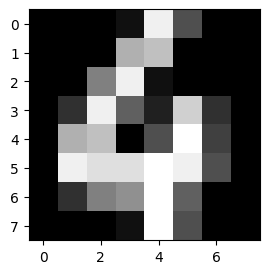

In [13]:
# Sample image
sample_image = X_train[0].reshape(8, 8)
plt.figure(figsize=(3, 3))
plt.imshow(sample_image, cmap='gray')
plt.show()

# **CNN Architecture**

In [14]:
#Defining CNN architecture with activation Relu and softmax
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)),
    MaxPooling2D((1, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((1, 1)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [15]:
# Visualizing model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 6, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 6, 6, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 512)               0

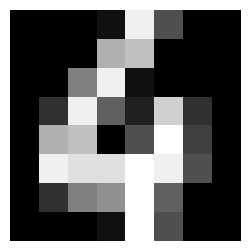

In [16]:
# Visualizing max pooling
plt.figure(figsize=(3, 3))
plt.imshow(X_train[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()

# **Model Training**

In [17]:
# training the model using adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
141/141 [==============================] - 7s 33ms/step - loss: 1.1332 - accuracy: 0.6444 - val_loss: 0.5251 - val_accuracy: 0.8674
Epoch 2/10
141/141 [==============================] - 3s 23ms/step - loss: 0.3829 - accuracy: 0.8819 - val_loss: 0.3782 - val_accuracy: 0.8906
Epoch 3/10
141/141 [==============================] - 3s 22ms/step - loss: 0.2623 - accuracy: 0.9177 - val_loss: 0.2497 - val_accuracy: 0.9262
Epoch 4/10
141/141 [==============================] - 4s 29ms/step - loss: 0.1790 - accuracy: 0.9455 - val_loss: 0.2131 - val_accuracy: 0.9333
Epoch 5/10
141/141 [==============================] - 4s 27ms/step - loss: 0.1493 - accuracy: 0.9515 - val_loss: 0.1651 - val_accuracy: 0.9555
Epoch 6/10
141/141 [==============================] - 3s 22ms/step - loss: 0.1153 - accuracy: 0.9615 - val_loss: 0.1648 - val_accuracy: 0.9484
Epoch 7/10
141/141 [==============================] - 3s 24ms/step - loss: 0.0924 - accuracy: 0.9738 - val_loss: 0.1262 - val_accuracy: 0.9644

# **Model Evaluation**

In [18]:
# Model accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

36/36 [==============================] - 0s 4ms/step - loss: 0.1146 - accuracy: 0.9689
Test accuracy: 0.9689


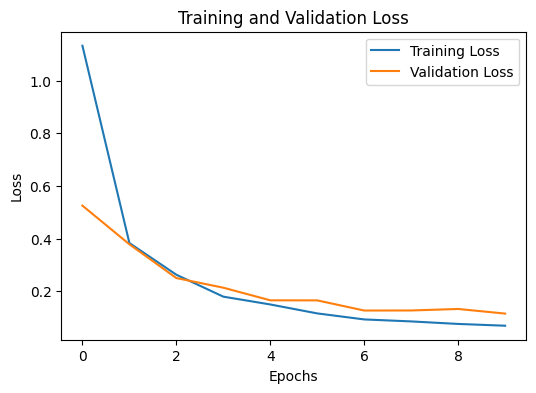

In [19]:
# plotting training vs validation loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

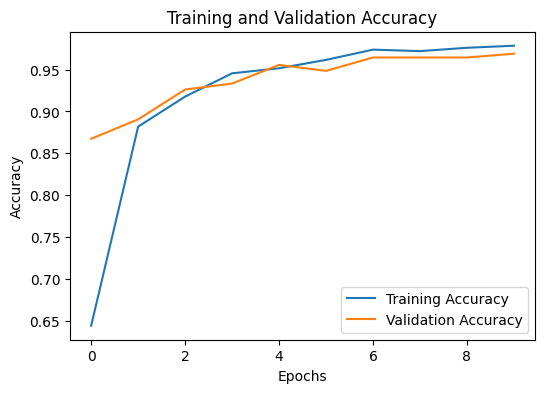

In [20]:
#plotting training vs validation accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **K-Fold cross validation**

In [21]:
# K-Fold cross validation
!pip install scikit-learn
import sklearn.model_selection as ms
kfold = ms.KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []
for train_idx, val_idx in kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    model.fit(X_train_fold, y_train_fold, epochs=5, validation_data=(X_val_fold, y_val_fold), verbose=0)
    val_acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]
    fold_accuracies.append(val_acc)


In [22]:
#fold wise accuracies
print(fold_accuracies)

[0.9855555295944214, 0.9855394959449768, 0.9877641797065735, 0.9855394959449768, 1.0]


In [23]:
#K-Fold mean accuracy
print("K-Fold Cross-Validation Accuracy: ",np.mean(fold_accuracies))

K-Fold Cross-Validation Accuracy:  0.9888797402381897


# **Confusion matrix**

36/36 [==============================] - 0s 7ms/step


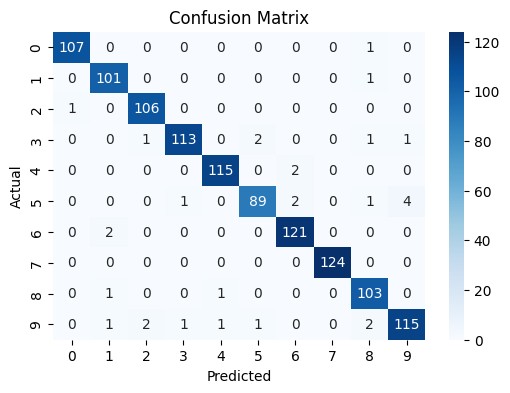

In [24]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
# Model metrics
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true,y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.9733
Precision: 0.9729
Recall: 0.9729
F1-score: 0.9728


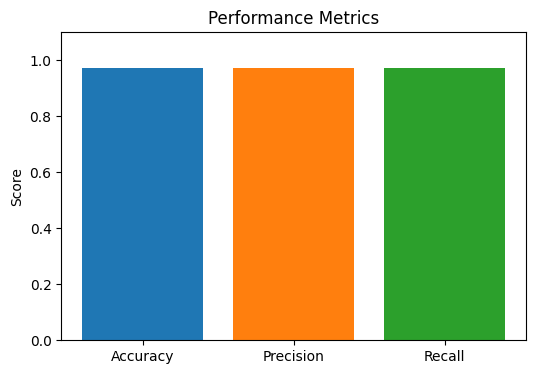

In [30]:
# Visualizing metrics
metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]
colors = ['tab:blue', 'tab:orange', 'tab:green']
plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=colors)
plt.ylim(0, 1.1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()